##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [186]:
import numpy as np
import pandas as pd
import sklearn.model_selection as slms
import sklearn.linear_model as sllm
import sklearn.metrics as slmt
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix, demo_data
import random

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [8]:
# P2
df = pd.read_csv("SCORES.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


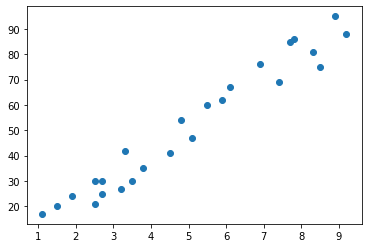

In [24]:
# P3
byax = (df["Hours"], df["Scores"])
plt.scatter(*byax)

In [60]:
# P4-6
x_t, x_v, y_t, y_v = slms.train_test_split(*byax, test_size=.3, shuffle=True)
lreg = sllm.LinearRegression(fit_intercept=True, copy_X=True).fit(x_t.to_numpy()[:, None] , y_t)

print("coefficients: {} - współczynnik(i) zmiennych niezależnych regresji".format(lreg.coef_))
print("intercept: {} - wyraz wolny".format(lreg.intercept_))

coefficients: [9.05300833] - współczynnik(i) zmiennych niezależnych regresji
intercept: 4.669443348724961 - wyraz wolny


In [66]:
pbnd = np.asarray(x_v)
pval = lreg.predict(pbnd [:, None])

for vx in range(len(x_v)):
    print("For x = {:>4}: predicted: {:>4.2f}, actual: {:>4}".format(pbnd[vx], pval[vx], y_v.to_numpy()[vx]))

For x =  7.7: predicted: 74.38, actual:   85
For x =  2.7: predicted: 29.11, actual:   25
For x =  6.1: predicted: 59.89, actual:   67
For x =  7.8: predicted: 75.28, actual:   86
For x =  8.9: predicted: 85.24, actual:   95
For x =  5.9: predicted: 58.08, actual:   62
For x =  1.5: predicted: 18.25, actual:   20
For x =  5.1: predicted: 50.84, actual:   47


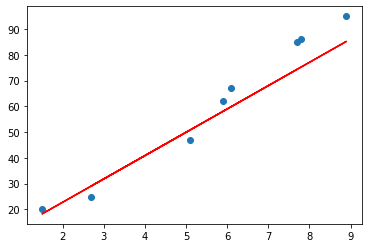

In [67]:
# P8
plt.scatter(x_v, y_v)
plt.plot(pbnd, pval, c='r')

In [75]:
# P9
residua = pval - y_v

print("MAE:  {:.2f}".format(np.abs(residua).mean()))
print("MSE:  {:.2f}".format(np.square(residua).mean()))
print("RMSE: {:.2f}".format(np.sqrt(np.square(residua).mean())))

MAE:  6.48
MSE:  52.94
RMSE: 7.28


MAE:  8.42
MSE:  113.25
RMSE: 10.64


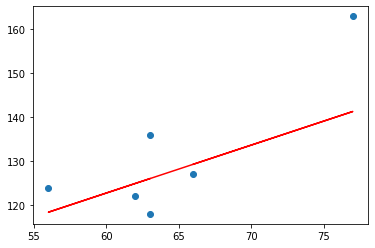

In [78]:
# P-SBP

df = pd.read_csv("SBP.csv")
byax = (df["Age"], df["SBP"])
x_t, x_v, y_t, y_v = slms.train_test_split(*byax, test_size=.3, shuffle=True)
lreg = sllm.LinearRegression(fit_intercept=True, copy_X=True).fit(x_t.to_numpy()[:, None] , y_t)
pbnd = np.asarray(x_v)
pval = lreg.predict(pbnd [:, None])
residua = pval - y_v

plt.scatter(x_v, y_v)
plt.plot(pbnd, pval, c='r')

print("MAE:  {:.2f}".format(np.abs(residua).mean()))
print("MSE:  {:.2f}".format(np.square(residua).mean()))
print("RMSE: {:.2f}".format(np.sqrt(np.square(residua).mean())))

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [79]:
df = pd.read_csv("PETROL.csv")
df

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


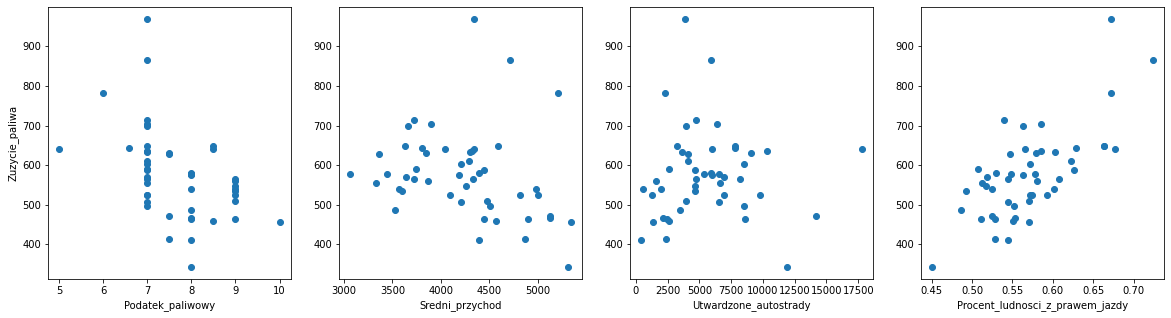

In [87]:
y_label = "Zuzycie_paliwa"
x_labels = ["Podatek_paliwowy", "Sredni_przychod", "Utwardzone_autostrady", "Procent_ludnosci_z_prawem_jazdy"]

fig, axs = plt.subplots(1, len(x_labels), figsize=(20, 5))

y = df[y_label].to_numpy()
axs[0].set_ylabel(y_label)
for ix, xl in enumerate(x_labels):
    x = df[xl].to_numpy()
    axs[ix].scatter(x, y)
    axs[ix].set_xlabel(xl)

In [96]:
x_w = np.asarray([df[label].to_numpy() for label in x_labels]).transpose()
y_w = y
x_t, x_v, y_t, y_v = slms.train_test_split(x_w, y_w, test_size=.3, shuffle=True)
lreg = sllm.LinearRegression(fit_intercept=True, copy_X=True).fit(x_t, y_t)

print("coefficients: {}".format(lreg.coef_))
print("intercept:    {}".format(lreg.intercept_))

coefficients: [-3.42978788e+01 -7.11704924e-02 -1.44053082e-03  1.33536916e+03]
intercept:    385.9871891415937


In [98]:
preds = lreg.predict(x_v)
for vx in range(len(x_v)):
    print("For x = {}: predicted: {:>4.2f}, actual: {:>4}".format(x_v[vx], preds[vx], y_v[vx]))

For x = [1.000e+01 5.342e+03 1.333e+03 5.710e-01]: predicted: 423.39, actual:  457
For x = [7.000e+00 3.718e+03 4.725e+03 5.400e-01]: predicted: 595.58, actual:  714
For x = [9.000e+00 3.571e+03 1.976e+03 5.250e-01]: predicted: 521.38, actual:  541
For x = [8.000e+00 3.063e+03 6.524e+03 5.780e-01]: predicted: 656.05, actual:  577
For x = [7.000e+00 5.002e+03 9.794e+03 5.930e-01]: predicted: 567.67, actual:  524
For x = [7.000e+00 4.318e+03 1.034e+04 5.860e-01]: predicted: 606.22, actual:  635
For x = [7.000e+00 4.716e+03 5.915e+03 7.240e-01]: predicted: 768.55, actual:  865
For x = [8.000e+00 5.126e+03 2.138e+03 5.530e-01]: predicted: 482.16, actual:  467
For x = [6.580e+00 3.802e+03 7.834e+03 6.290e-01]: predicted: 718.38, actual:  644
For x = [9.000e+00 3.865e+03 1.586e+03 5.800e-01]: predicted: 574.46, actual:  561
For x = [7.000e+00 3.745e+03 2.611e+03 5.080e-01]: predicted: 553.97, actual:  591
For x = [7.000e+00 3.640e+03 6.905e+03 5.180e-01]: predicted: 568.62, actual:  571
For 

In [124]:
# fig, axs = plt.subplots(1, len(x_labels), figsize=(20, 5))

# axs[0].set_ylabel(y_label + " predicted")
# for ix, xl in enumerate(x_labels):
#     x = x_v[:, ix]
#     axs[ix].scatter(x, y_v)
#     axs[ix].plot(x, preds, c='r')
#     axs[ix].set_xlabel(xl)

In [102]:
residua = preds - y_v

print("MAE:  {:.2f}".format(np.abs(residua).mean()))
print("MSE:  {:.2f}".format(np.square(residua).mean()))
print("RMSE: {:.2f}".format(np.sqrt(np.square(residua).mean())))

MAE:  46.30
MSE:  3294.17
RMSE: 57.39


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [129]:
# P2
df1 = pd.read_csv("HEART.csv")
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [130]:
# P3
df2 = df1
df2[df2 == "?"] = float("NaN")
for invalid_col in ["slope", "ca", "thal"]:
    del df2[invalid_col]
df2 = df2.dropna(axis=0, how="any")
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [160]:
# P4
d_labels = ["restecg", "cp"]
df3 = pd.get_dummies(df2, columns=d_labels)
df3

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4
0,28,1,130,132,0,185,0,0.0,0,0,0,1,0,1,0,0
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,0,1,0,1,0,0,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,1,0,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,1,0,0,0,0,0,1
290,54,0,130,294,0,100,1,0.0,1,0,1,0,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,1,0,0,0,0,0,1
292,58,0,180,393,0,110,1,1.0,1,1,0,0,0,1,0,0


In [183]:
# P5
y_label = "num       "
x_labels = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
   'oldpeak', 'restecg_0', 'restecg_1', 'restecg_2',
   'cp_1', 'cp_2', 'cp_3', 'cp_4']

x_a = df3[x_labels].to_numpy()
y_a = df3[y_label].to_numpy()

In [184]:
# P6
x_t, x_v, y_t, y_v = slms.train_test_split(x_a, y_a, test_size=.2, shuffle=True)
lreg = sllm.LogisticRegression(fit_intercept=True, max_iter=2e16).fit(x_t, y_t)

print("coefficients: {}".format(lreg.coef_))
print("intercept:    {}".format(lreg.intercept_))

coefficients: [[ 0.01424803  1.19025413 -0.00625934  0.00524036  0.56840007 -0.01510952
   0.78049236  1.05296633  0.26368691 -0.13473642 -0.15820506  0.17882465
  -1.09165982  0.07935392  0.80422669]]
intercept:    [-1.74534599]


In [204]:
# P7
preds = lreg.predict(x_v)
residua = preds - y_v

pred_label = "PRED num"
# vis = np.concatenate(x_t, y_t, preds, dtype=float)
df4 = pd.DataFrame({label: x_v[:, ix] for ix, label in enumerate(x_labels)})
df4[y_label] = y_v 
df4[pred_label] = preds

df4

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4,num,PRED num
0,40,1,140,289,0,172,0,0.0,1,0,0,0,1,0,0,0,0
1,47,0,120,205,0,98,1,2.0,1,0,0,0,0,0,1,1,1
2,52,1,160,246,0,82,1,4.0,0,1,0,0,0,0,1,1,1
3,41,0,125,184,0,180,0,0.0,1,0,0,0,1,0,0,0,0
4,43,1,140,288,0,135,1,2.0,1,0,0,0,0,0,1,1,1
5,55,1,120,270,0,140,0,0.0,1,0,0,0,0,0,1,0,0
6,52,1,120,284,0,118,0,0.0,1,0,0,0,1,0,0,0,0
7,54,1,150,365,0,134,0,1.0,0,1,0,0,0,0,1,0,1
8,42,1,120,196,0,150,0,0.0,1,0,0,0,1,0,0,0,0
9,48,1,140,238,0,118,0,0.0,1,0,0,0,1,0,0,0,0


In [205]:
print("MAE:  {:.2f}".format(np.abs(residua).mean()))
print("MSE:  {:.2f}".format(np.square(residua).mean()))
print("RMSE: {:.2f}".format(np.sqrt(np.square(residua).mean())))
print(slmt.classification_report(y_v, preds))

MAE:  0.17
MSE:  0.17
RMSE: 0.41
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.74      0.85      0.79        20

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53

